He decidido empezar el EDA viendo las comparativas de los valores de criptomonedas, U$d, Peso Argentino, etc, en comparación al valor de un Bitcoin, siendo mas claro, por ejemplo, cuantos pesos argentinos equivalen hoy a un Bitcoin, como CURIOSIDAD, todavia no empece a ver mis KPIs elegidos y para ver que tan distantes se encuentran los precios entre si, solo curiosidad, la informacion es extraida de la api coingenko al dia 2023-08-23 (actualidad):

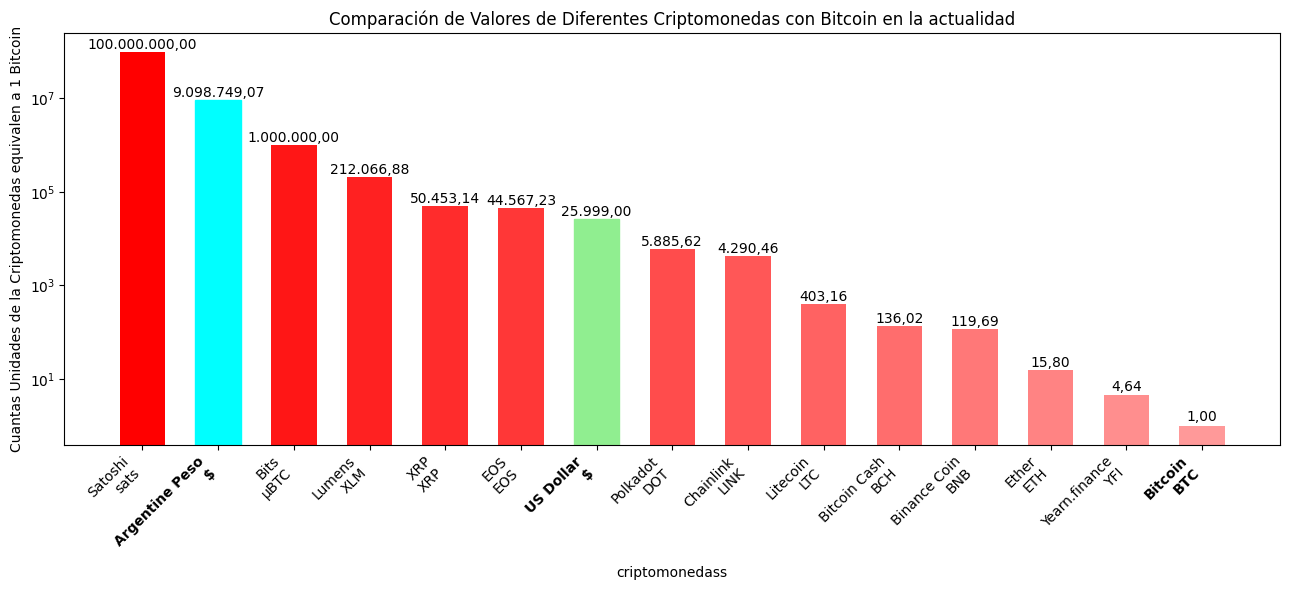

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np


def formato_decimales(num):
    """
    Función que formatea un número al estilo deseado: 
    parte entera separada por puntos y decimales por comas.
    """
    parte_int = int(num)
    parte_decimal = num - parte_int

    # Formatear la parte entera con puntos como separadores de miles
    int_a_str = '{:,.0f}'.format(parte_int).replace(",", ".")

    # Formatear la parte decimal
    decimal_a_str = '{:.2f}'.format(parte_decimal)[1:]  # ignorar el "0" antes del punto

    return int_a_str + decimal_a_str.replace(".", ",")


# Desactivar las advertencias
warnings.filterwarnings("ignore")

# Cargar los datos desde el archivo CSV
df = pd.read_csv("ETL_API_coingenko\criptos_a_precio_BTC\criptos_a_precio_BTC.csv")

# Filtrar las columnas de interés: name ,value, unit
df_filtrado = df[['name', 'value','unit']]

# Aquí estoy asumiendo que las comas son separadores de miles y los puntos son decimales.
df_filtrado['value'] = df_filtrado['value'].str.replace('.', '').str.replace(',', '.').astype(float)

# Ordenar el DataFrame por la columna 'value' de mayor a menor
df_filtrado = df_filtrado.sort_values(by='value', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(13, 6))  # Ajusta los valores según tus preferencias

# Definir los colores rojos con diferentes niveles de transparencia (mayor valor menos transparente)
n_barras = len(df_filtrado)
alphas = np.linspace(0.4, 1, n_barras)

colores = [(1, 0, 0, alpha) for alpha in reversed(alphas)]

barras = plt.bar(df_filtrado['name'] + "\n" + df_filtrado['unit'], df_filtrado['value'], color=colores, width=0.6)

# Agregar etiquetas de valor arriba de las barras y verificar el cambio de color
for bar, name in zip(barras, df_filtrado['name']):

    valor = bar.get_height()
    valor_formateado = formato_decimales(valor)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, valor_formateado, ha='center', va='bottom')
    
    # Cambiar el color si es "Argentine Peso" o "US Dollar"
    if name == "Argentine Peso":
        bar.set_color('cyan')  # color celeste
    elif name == "US Dollar":
        bar.set_color('lightgreen')  # color verde claro

xticks = plt.gca().get_xticklabels()
for label in xticks:
    if "Argentine Peso" in label.get_text() or "US dollar" in label.get_text():
        label.set_weight('bold')
    if "US Dollar" in label.get_text() or "US dollar" in label.get_text():
        label.set_weight('bold')
    if "Bitcoin\n" in label.get_text() or "US dollar" in label.get_text():
        label.set_weight('bold')

# Configurar títulos y etiquetas
plt.title("Comparación de Valores de Diferentes Criptomonedas con Bitcoin en la actualidad")
plt.xlabel("criptomonedass")
plt.ylabel("Cuantas Unidades de la Criptomonedas equivalen a 1 Bitcoin")
plt.yscale('log')  # Escalar el eje y logarítmicamente

# Rotar etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Aqui simplemente podemos ver la oportunidad que algunos hemos perdido alla entonces cuando apenas arrancaba el valor de un bitcoin sin irnos a Fechas de la primer aparición del bitcoin en el mercado(enero del 2009), vamos un tiempo mas adelante cuando esto ya no era una novedad tan reciente, por ejemplo 10 años atras (2013-08-27) un bitcoin valia:  125.67 Dólares, suponemos la compra de un solo Bitcoin en aquel entonces, hoy lo podriamos vender a 25.999 Dólares, <strong>dejandonos una ganancia del 20.688,31 % de aquella inversion</strong>, aquellos visionarios que inviertieron teniendo una mirada hacia el futuro, tuvieron su gran recompenza, pero no perdamos el foco, esto nada tiene que ver con las oportunidades de inversion que hoy siguen siendo rentables, y seguras en criptomonedas.

---

dato interesante...

El primer intercambio registrado de Bitcoin por moneda fiduciaria se produjo el dia 22 de mayo de 2010 cuando un programador llamado Laszlo Hanyecz pagó 10.000 bitcoins por dos pizzas, lo que a menudo se cita como la primera transacción "real" en la economía de Bitcoin. Es un evento histórico en la comunidad de Bitcoin y se celebra anualmente como el "Bitcoin Pizza Day".

---


Aqui empezamos a observar uno de los KPIs elegidos para observar segun la <STRONG>CAPITALIZACION DE MERCADO</STRONG>, Representa el valor total de una criptomoneda y es un indicador de su popularidad y adopción en el mercado. Una alta capitalización puede ser una señal de confianza en esa criptomoneda. el valor que representa es todas las unidades dispersas en el mercado de esa criptomoneda por el precio que tiene cada unidad al dia, eso indica cuanta liquidez, cuanto se ha distribuido la criptomoneda en el mercado, que tan famosa es, que tan confiable es, si vale mucho aparte de estar distribuida son todos buenos factores que indicarian que podria ser una buena inversion, junto a los demas KPIs

---

<strong>Criptomonedas de Alta Capitalización: (Mayor a 10 mil millones de dólares)</strong><br>
Ejemplos: Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB), Cardano (ADA), entre otras.
Características:
Generalmente, son monedas más establecidas con una mayor historia y adopción.
Suelen tener comunidades más grandes y activas.
Se perciben como "menos riesgosas" en comparación con monedas de menor capitalización, aunque sigue siendo un mercado volátil.

<strong>Criptomonedas de Capitalización Media: (Entre 1 mil millones y 10 mil millones de dólares)</strong><br>
Ejemplos pueden variar con el tiempo, pero pueden incluir monedas como Chainlink (LINK), Litecoin (LTC), Stellar (XLM), entre otras.
Características:
Estas criptomonedas a menudo tienen tecnologías o propuestas de valor sólidas pero todavía no han alcanzado la adopción masiva.
Pueden ser más volátiles que las monedas de alta capitalización.
A menudo, se consideran como monedas con potencial de crecimiento.

<strong>Criptomonedas de Baja Capitalización: (Menos de 1 mil millones de dólares)</strong><br>
Hay miles de estas monedas, muchas de las cuales son proyectos nuevos o menos conocidos.
Características:
Son las más volátiles y, por ende, las más riesgosas.
Pueden ofrecer retornos más altos, pero también hay un mayor riesgo de pérdida total.
Es fundamental investigar bien antes de invertir en estas criptomonedas, ya que muchas no tienen un producto funcional o una comunidad activa detrás.

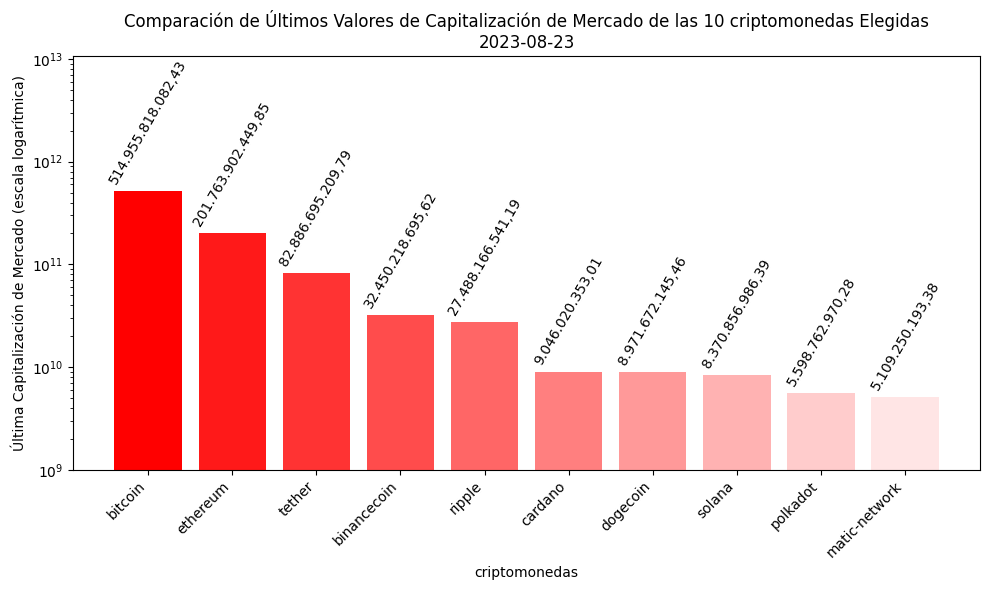

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import os

def formato_decimales(num):
    """
    Función que formatea un número al estilo deseado: 
    parte entera separada por puntos y decimales por comas.
    """
    parte_entera = int(num)
    parte_decimal = num - parte_entera

    # Formatear la parte entera con puntos como separadores de miles
    entera_a_str = '{:,.0f}'.format(parte_entera).replace(",", ".")

    # Formatear la parte decimal
    decimal_a_str = '{:.2f}'.format(parte_decimal)[1:]  # ignorar el "0" antes del punto

    return entera_a_str + decimal_a_str.replace(".", ",")

# Desactivar las advertencias
warnings.filterwarnings("ignore")

# Directorio donde se encuentran los archivos CSV de las criptomonedas
directorio = r"ETL_API_coingenko\KPIs_elegidos_de_diez_cryptos"

# Crear una lista para almacenar los valores de capitalización de mercado de cada criptomoneda
capitalizaciones = []

# Iterar a través de los archivos CSV en el directorio y obtener el último valor de capitalización de mercado
for nombre_archivo in os.listdir(directorio):
    if nombre_archivo.endswith('.csv'):
        archivo_csv = os.path.join(directorio, nombre_archivo)
        df = pd.read_csv(archivo_csv)
        ultima_capitalizacion = df['Capitalizacion_de_Mercado'].iloc[-2]  # Obtener el último valor de capitalización de mercado
        capitalizaciones.append(ultima_capitalizacion)

# Obtener los nombres de las criptomonedas (sin la extensión .csv) de los archivos
nombres_cryptos = [nombre_archivo.split('.')[0] for nombre_archivo in os.listdir(directorio) if nombre_archivo.endswith('.csv')]

# Combinar los nombres de las criptomonedas y sus respectivas capitalizaciones de mercado
datos_cryptos = list(zip(nombres_cryptos, capitalizaciones))

# Ordenar la lista de datos por el valor de capitalización de mercado de mayor a menor
datos_ordenados = sorted(datos_cryptos, key=lambda x: x[1], reverse=True)

# Separar los datos ordenados en nombres y valores de capitalización de mercado
nombres_ordenados, capitalizaciones_ordenadas = zip(*datos_ordenados)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar tamaño según preferencias

# Definir los colores rojos con diferentes niveles de transparencia

n_barras = len(capitalizaciones_ordenadas)
alphas = np.linspace(0.1, 1, n_barras)

colores = [(1, 0, 0, alpha) for alpha in reversed(alphas)]

# Crear el gráfico de barras con colores y transparencia personalizada
barras = plt.bar(nombres_ordenados, capitalizaciones_ordenadas, color=colores)

# Agregar etiquetas de valor encima de las barras
for barra in barras:
    valor = barra.get_height()
    valor_formateado = formato_decimales(valor)
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() * 1.10, valor_formateado, ha='center', va='bottom', rotation=60)

# Configurar títulos y etiquetas
plt.title("Comparación de Últimos Valores de Capitalización de Mercado de las 10 criptomonedas Elegidas\n2023-08-23")
plt.xlabel("criptomonedas")
plt.ylabel("Última Capitalización de Mercado (escala logarítmica)")

# Escalar el eje y logarítmicamente
plt.yscale('log')

# Ajustar los límites del eje y para que los valores por encima de las columnas sean visibles
plt.ylim(1e9, plt.ylim()[1] + 1e13)  # Aumentar en 1e10

# Rotar etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

plt.show()


Aqui podemos concluir que estamos frente a 10 criptomonedasmonedas de buena Capitalización de Mercado, diversificando la cartera en la mitad de muy alta capitalización, y la otra mitad de media a alta capitalización, pero no vemos criptomonedasmonedas de baja capitalizacion que seria un indicador de riesgo, serian criptomonedasmonedas que estan en su nacimiento, por lo tanto las más volátiles y, por ende, las más riesgosas.<br><br>
<strong>Pueden ofrecer retornos más altos, pero también hay un mayor riesgo de pérdida total.</strong><br><br>
Es fundamental investigar bien antes de invertir en estas criptomonedas, ya que muchas no tienen un producto funcional o una comunidad activa detrás.

---

Ahora vamos por KPI de <strong>VOLUMEN DE COMERCIO EN 24h:</strong> Un alto volumen de comercio sugiere una fuerte actividad y liquidez para la criptomoneda. Esto es crucial para los inversores que desean comprar o vender grandes cantidades sin afectar significativamente el precio.

---

<strong>Criptomonedas con Alto Volumen de Comercio:(Volumen en las últimas 24 horas: Mayor a 1 mil millones de dólares)</strong><br>
Características:
Suelen ser las criptomonedas más conocidas y confiables.
Alta liquidez y, generalmente, menor volatilidad en comparación con monedas de menor volumen.
Puede haber una mayor resistencia a la manipulación del precio.
Ejemplos: Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB).

<strong>Criptomonedas con Volumen de Comercio Medio:(Volumen en las últimas 24 horas: Entre 100 millones y 1 mil millones de dólares)</strong><br>
Características:
Estas criptomonedas suelen tener una presencia consolidada en el mercado, pero aún no alcanzan los niveles de las más grandes.
Liquidez moderada, lo que las hace razonablemente estables pero susceptibles a grandes movimientos con órdenes de mayor tamaño.
Ejemplos pueden variar, pero algunas como Chainlink (LINK) o Litecoin (LTC) podrían entrar en esta categoría en determinados momentos.

<strong>Criptomonedas con Bajo Volumen de Comercio:(Volumen en las últimas 24 horas: Menos de 100 millones de dólares)</strong><br>
Características:
Estas monedas pueden ser menos líquidas, lo que significa que grandes órdenes pueden tener un impacto más significativo en el precio.
Mayor susceptibilidad a la manipulación de precios y "bombas y descargas" (pump and dump).
Investigación exhaustiva requerida antes de invertir, ya que muchas pueden ser proyectos muy nuevos o menos probados en el mercado.

---

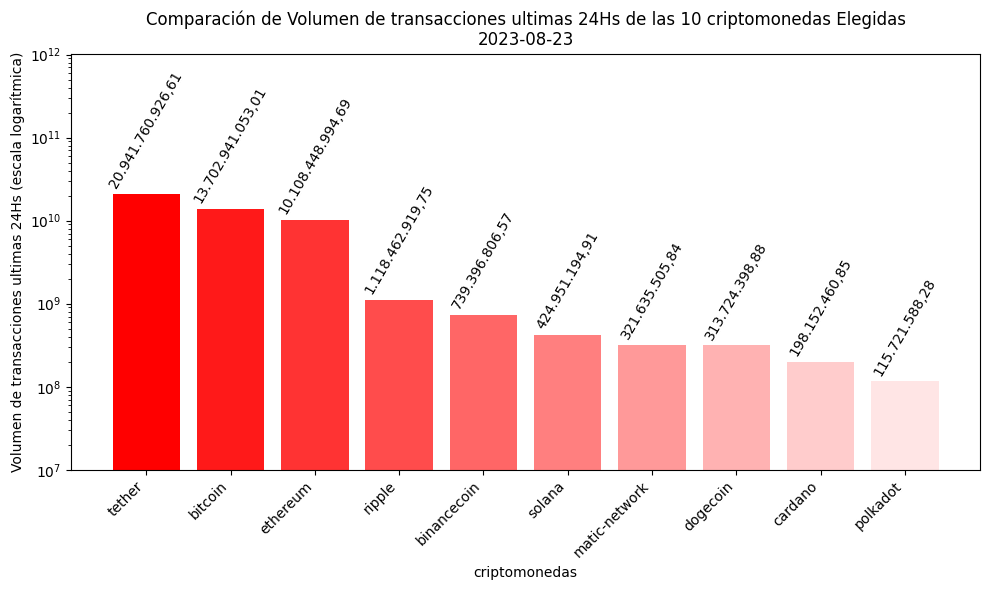

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

def formato_decimales(num):
    """
    Función que formatea un número al estilo deseado: 
    parte entera separada por puntos y decimales por comas.
    """
    parte_entera = int(num)
    parte_decimal = num - parte_entera

    # Formatear la parte entera con puntos como separadores de miles
    entera_a_str = '{:,.0f}'.format(parte_entera).replace(",", ".")

    # Formatear la parte decimal
    decimal_a_str = '{:.2f}'.format(parte_decimal)[1:]  # ignorar el "0" antes del punto

    return entera_a_str + decimal_a_str.replace(".", ",")

# Desactivar las advertencias
warnings.filterwarnings("ignore")

# Directorio donde se encuentran los archivos CSV de las criptomonedas
directorio = r"ETL_API_coingenko\KPIs_elegidos_de_diez_cryptos"

# Crear una lista para almacenar los valores de capitalización de mercado de cada criptomoneda
capitalizaciones = []

# Iterar a través de los archivos CSV en el directorio y obtener el último valor de capitalización de mercado
for nombre_archivo in os.listdir(directorio):
    if nombre_archivo.endswith('.csv'):
        archivo_csv = os.path.join(directorio, nombre_archivo)
        df = pd.read_csv(archivo_csv)
        ultima_capitalizacion = df['Volumen_24h'].iloc[-2]  # Obtener el último valor de capitalización de mercado
        capitalizaciones.append(ultima_capitalizacion)

# Obtener los nombres de las criptomonedas (sin la extensión .csv) de los archivos
nombres_criptomonedass = [nombre_archivo.split('.')[0] for nombre_archivo in os.listdir(directorio) if nombre_archivo.endswith('.csv')]

# Combinar los nombres de las criptomonedas y sus respectivas capitalizaciones de mercado
datos_cryptos = list(zip(nombres_cryptos, capitalizaciones))

# Ordenar la lista de datos por el valor de capitalización de mercado de mayor a menor
datos_ordenados = sorted(datos_cryptos, key=lambda x: x[1], reverse=True)

# Separar los datos ordenados en nombres y valores de capitalización de mercado
nombres_ordenados, capitalizaciones_ordenadas = zip(*datos_ordenados)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar tamaño según preferencias

# Definir los colores rojos con diferentes niveles de transparencia

n_barras = len(capitalizaciones_ordenadas)
alphas = np.linspace(0.1, 1, n_barras)

colores = [(1, 0, 0, alpha) for alpha in reversed(alphas)]

# Crear el gráfico de barras con colores y transparencia personalizada
barras = plt.bar(nombres_ordenados, capitalizaciones_ordenadas, color=colores)

# Agregar etiquetas de valor encima de las barras
for barra in barras:
    valor = barra.get_height()
    valor_formateado = formato_decimales(valor)
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() * 1.10, valor_formateado, ha='center', va='bottom', rotation=60)

# Configurar títulos y etiquetas
plt.title("Comparación de Volumen de transacciones ultimas 24Hs de las 10 criptomonedas Elegidas\n2023-08-23")
plt.xlabel("criptomonedas")
plt.ylabel("Volumen de transacciones ultimas 24Hs (escala logarítmica)")

# Escalar el eje y logarítmicamente
plt.yscale('log')

# Ajustar los límites del eje y para que los valores por encima de las columnas sean visibles
plt.ylim(1e7, plt.ylim()[1] + 1e12)  # Aumentar en 1e10

# Rotar etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

plt.show()


Nuevamente podemos observar buenos resultados para este KPI, pudiendo dividir la cartera en dos partes cryptomonedas con alto volumen de comercio en las ultimas 24hs indicando Alta liquidez y, generalmente, menor volatilidad en comparación con monedas de menor volumen, y la otra mitad, con valores de medio a alto volumen de comercio, esto indica que son criptomonedas que suelen tener una presencia consolidada en el mercado, pero aún no alcanzan los niveles de las más grandes, Liquidez moderada, lo que las hace razonablemente estables pero susceptibles a grandes movimientos con órdenes de mayor tamaño.

---

Finalmente Vamos a observar nuestro tercer KPI elegido que representa la <strong>Volatilidad del Precio (a 30 días):</strong>
La volatilidad indica el nivel de riesgo asociado con la inversión en una criptomoneda. Una baja volatilidad puede 
indicar estabilidad, mientras que una alta volatilidad puede presentar oportunidades de inversión a corto plazo.

<strong>Baja Volatilidad (Mensual): Menos del 10%.(valores entre 0 y 0.1)</strong>
Estas criptomonedas están mostrando poca variación en el mes en consideración. 
La baja volatilidad mensual podría indicar estabilidad temporal.

<strong>Volatilidad Media (Mensual): 10% - 30%.(valores del 0.1 al 0.3)</strong>
Es un rango en el que muchas criptomonedas podrían encontrarse en un mes dado, 
especialmente aquellas que tienen un buen nivel de adopción y liquidez, pero que aún enfrentan eventos de mercado significativos.

<strong>Alta Volatilidad (Mensual): Más del 30%.(valores mayores a 0.3)</strong>
Criptomonedas en este rango están experimentando movimientos de precios significativos durante el mes. 
Esto podría ser el resultado de eventos específicos, noticias, especulación, entre otros factores.

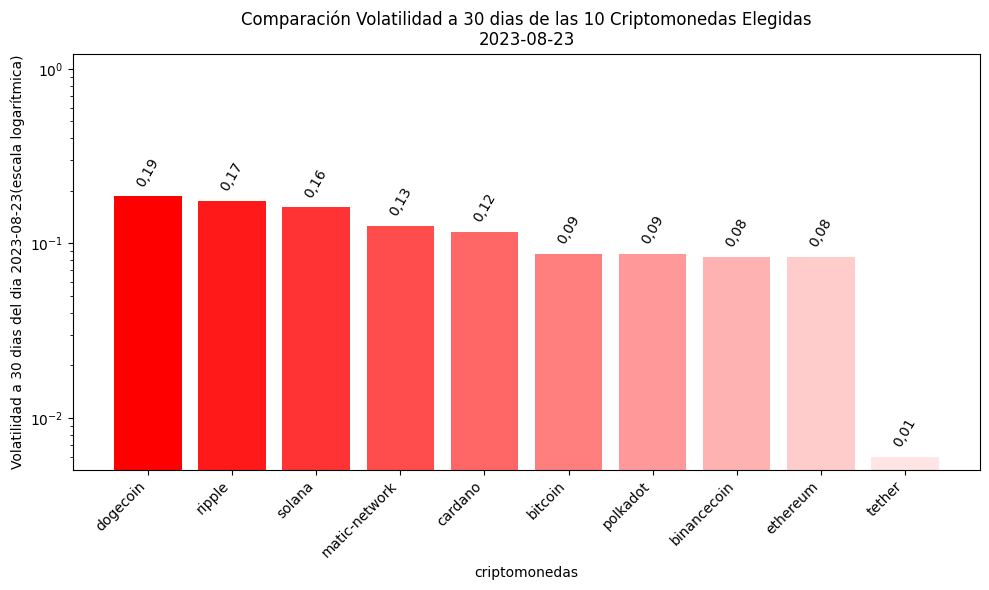

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

def formato_decimales(num):
    """
    Función que formatea un número al estilo deseado: 
    parte entera separada por puntos y decimales por comas.
    """
    parte_entera = int(num)
    parte_decimal = num - parte_entera

    # Formatear la parte entera con puntos como separadores de miles
    entera_a_str = '{:,.0f}'.format(parte_entera).replace(",", ".")

    # Formatear la parte decimal
    decimal_a_str = '{:.2f}'.format(parte_decimal)[1:]  # ignorar el "0" antes del punto

    return entera_a_str + decimal_a_str.replace(".", ",")

# Desactivar las advertencias
warnings.filterwarnings("ignore")

# Directorio donde se encuentran los archivos CSV de las criptomonedas
directorio = r"ETL_API_coingenko\KPIs_elegidos_de_diez_cryptos"

# Crear una lista para almacenar los valores de capitalización de mercado de cada criptomoneda
capitalizaciones = []

# Iterar a través de los archivos CSV en el directorio y obtener el último valor de capitalización de mercado
for nombre_archivo in os.listdir(directorio):
    if nombre_archivo.endswith('.csv'):
        archivo_csv = os.path.join(directorio, nombre_archivo)
        df = pd.read_csv(archivo_csv)
        ultima_capitalizacion = df['Volatilidad_a_30_dias'].iloc[-2]  # Obtener el último valor de capitalización de mercado
        capitalizaciones.append(ultima_capitalizacion)

# Obtener los nombres de las criptomonedas (sin la extensión .csv) de los archivos
nombres_cryptos = [nombre_archivo.split('.')[0] for nombre_archivo in os.listdir(directorio) if nombre_archivo.endswith('.csv')]

# Combinar los nombres de las criptomonedas y sus respectivas capitalizaciones de mercado
datos_cryptos = list(zip(nombres_cryptos, capitalizaciones))

# Ordenar la lista de datos por el valor de capitalización de mercado de mayor a menor
datos_ordenados = sorted(datos_cryptos, key=lambda x: x[1], reverse=True)

# Separar los datos ordenados en nombres y valores de capitalización de mercado
nombres_ordenados, capitalizaciones_ordenadas = zip(*datos_ordenados)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar tamaño según preferencias

# Definir los colores rojos con diferentes niveles de transparencia

n_barras = len(capitalizaciones_ordenadas)
alphas = np.linspace(0.1, 1, n_barras)

colores = [(1, 0, 0, alpha) for alpha in reversed(alphas)]

# Crear el gráfico de barras con colores y transparencia personalizada
barras = plt.bar(nombres_ordenados, capitalizaciones_ordenadas, color=colores)

# Agregar etiquetas de valor encima de las barras
for barra in barras:
    valor = barra.get_height()
    valor_formateado = formato_decimales(valor)
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() * 1.10, valor_formateado, ha='center', va='bottom', rotation=60)

# Configurar títulos y etiquetas
plt.title("Comparación Volatilidad a 30 dias de las 10 Criptomonedas Elegidas\n2023-08-23")
plt.xlabel("criptomonedas")
plt.ylabel("Volatilidad a 30 dias del dia 2023-08-23(escala logarítmica)")

# Escalar el eje y logarítmicamente
plt.yscale('log')

# Ajustar los límites del eje y para que los valores por encima de las columnas sean visibles
plt.ylim(0, plt.ylim()[1] + 1)  # Aumentar en 1e10

# Rotar etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

plt.show()

Por último este kpi nos muestra que ninguna de nuestras criptomonedas pertenece o se acerca al grupo de alta volatilidad a 30 dias, ya que ninguna se acerca al 0.3 lo que equivale a decir al 30%, como dijimos Es un rango en el que muchas criptomonedas podrían encontrarse en un mes dado, especialmente aquellas que tienen un buen nivel de adopción y liquidez, pero que aún enfrentan eventos de mercado significativos. De todas formas podemos observar que tienden en su mayoria al valor de 0.1 lo cual indicaria poca variación en el mes en consideración. 
La baja volatilidad mensual podría indicar estabilidad temporal.

---

Ahora que pudimos observar buenos resultados vamos a someter a nuestras 10 criptomonedas elegidas a un analisis desde la actualidad tres años hacia atras, con datos traidos de la api Coingenko historicos, y veremos como se han comportado hasta la actualidad, siempre desde la óptica de nuestros 3 KPIs elegidos para ponderar el interes sobre la inversión en estas criptomonedas:

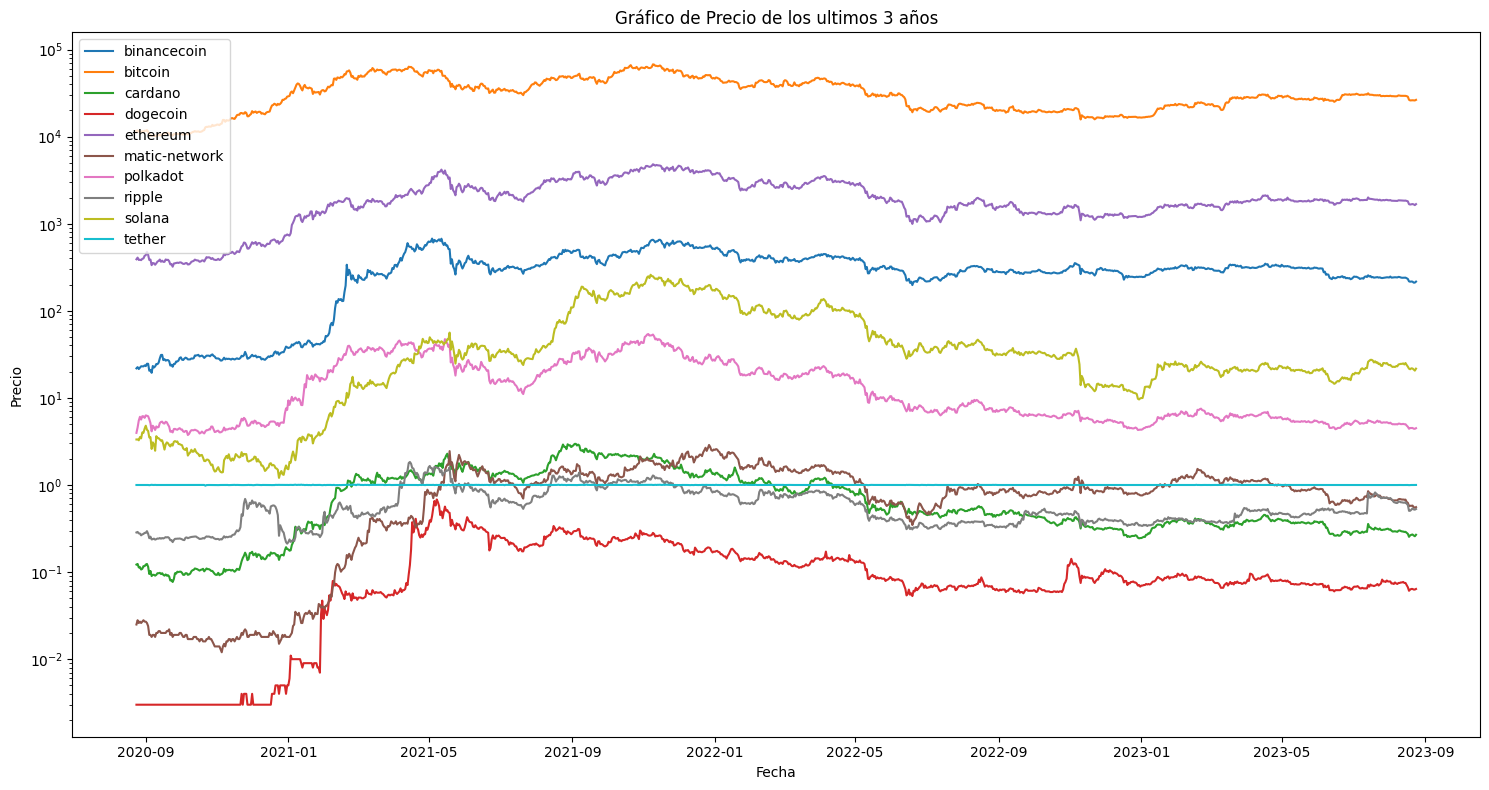

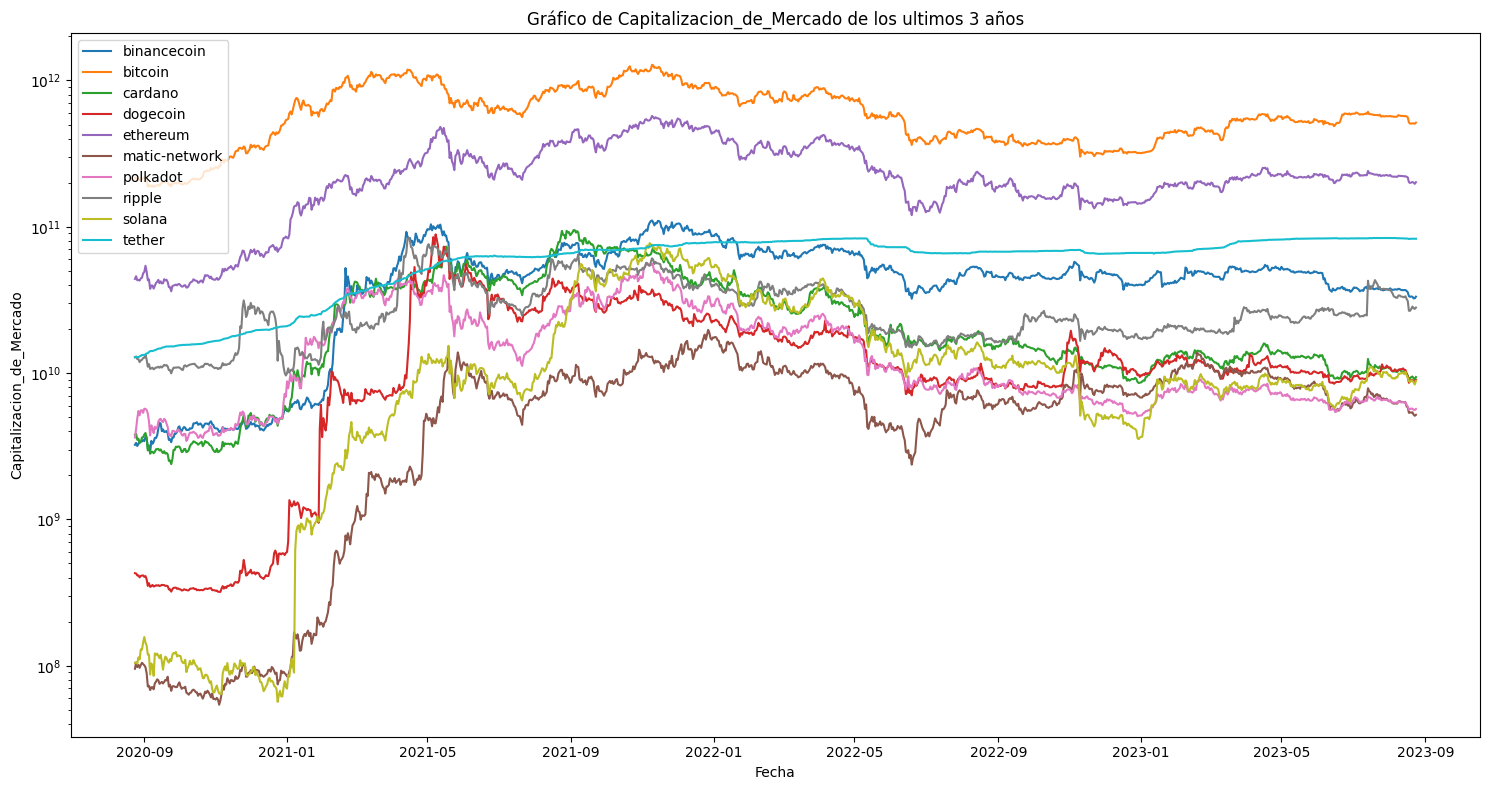

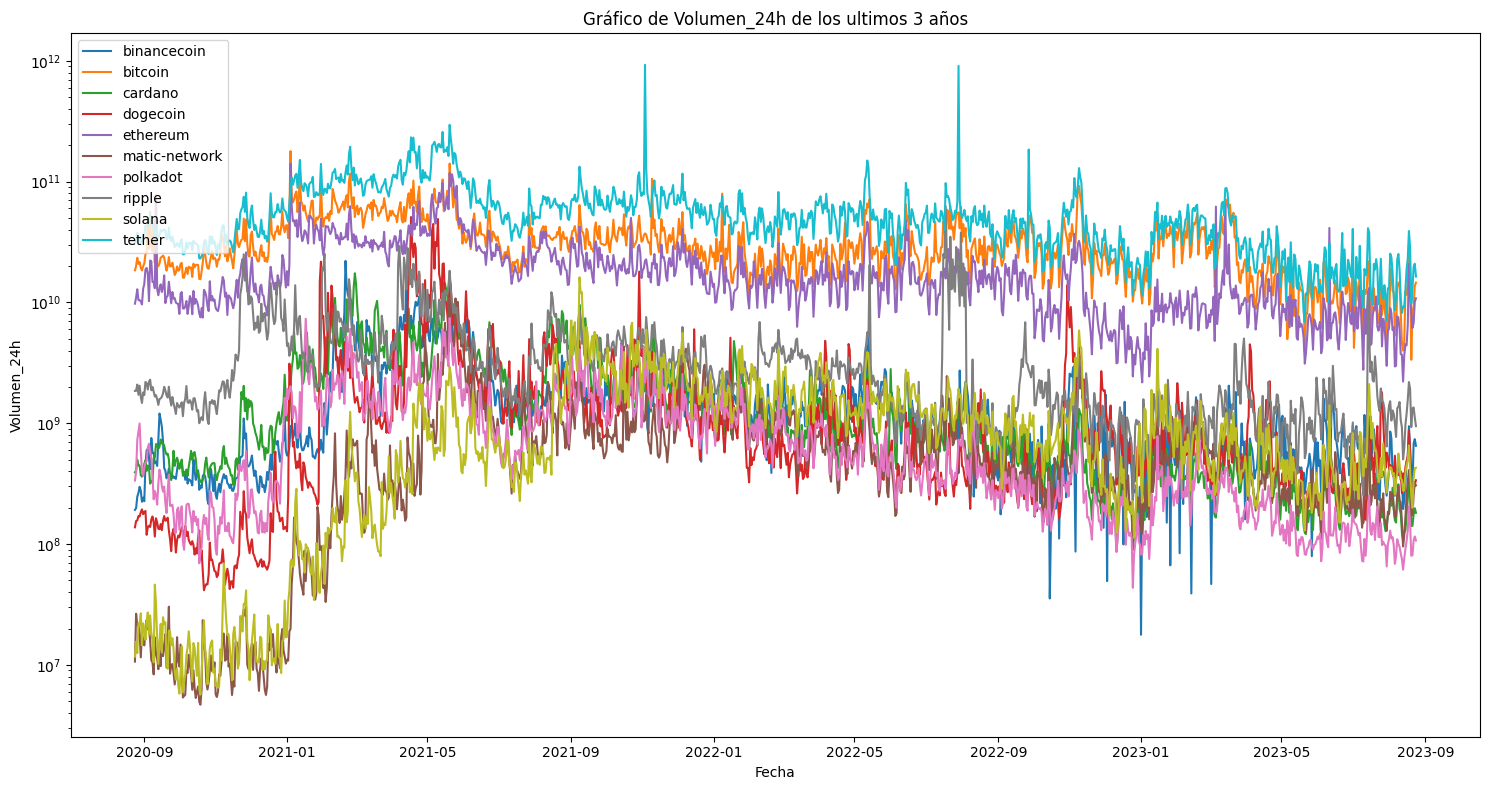

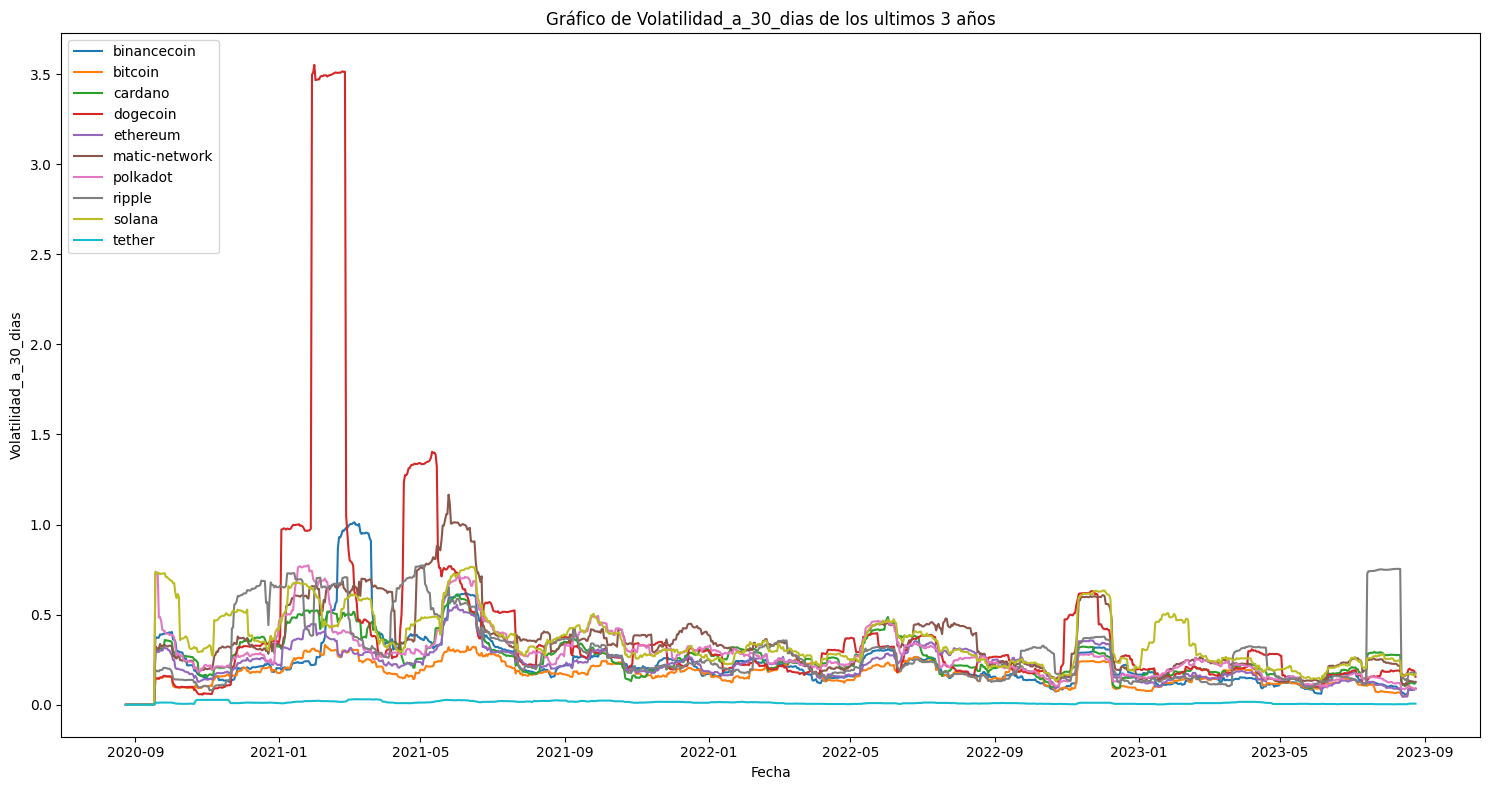

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Lista de las columnas que quiero graficar
columnas = ['Precio','Capitalizacion_de_Mercado','Volumen_24h','Volatilidad_a_30_dias']

# Directorio donde se encuentran los archivos CSV
directorio = 'ETL_API_coingenko\KPIs_elegidos_diez_cryptos_mismo_RANGO_FECHAS'

# Creo un diccionario para almacenar los DataFrames
dfs = {}

# Leer y filtrar por los ultimos 3 años
for nombre_archivo in os.listdir(directorio):
    if nombre_archivo.endswith('.csv'):
        ruta_completa = os.path.join(directorio, nombre_archivo)
        df = pd.read_csv(ruta_completa, parse_dates=['Fecha'])
        
        Fecha_maxima = df['Fecha'].max()
        Fecha_inicio = Fecha_maxima - pd.DateOffset(years=3)
        df_filtrado = df[df['Fecha'] >= Fecha_inicio]
        
        # Almacenar en el diccionario los nombres de 
        crypto_nombre = nombre_archivo.split('.')[0] # Eliminar la extensión .csv
        dfs[crypto_nombre] = df_filtrado
        
        

# Crear gráficos
for col in columnas:
    plt.figure(figsize=(15, 8))
    for crypto_nombre, df in dfs.items():
        plt.plot(df['Fecha'], df[col], label=crypto_nombre)
    
    plt.title(f'Gráfico de {col} de los ultimos 3 años')
    plt.xlabel('Fecha')
    plt.ylabel(col)
    if col == 'Volatilidad_a_30_dias': pass
    else: plt.yscale('log')   
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


<strong>A 3 años como podemos observar, los precios se encuentran muy estables como podemos apreciar para todas las criptomonedas elegidas, en capitalizacion de mercado podemos apreciar que si bien han habido algunas variaciones niguna moneda bajo de los 100.000.000 millones de dólares en capitalizacion lo cual nos habla de monedas muy establecidas y sólidas en el mercado, lo mismo podemos apreciar para el volumen de operaciones la media de estas variaciones no baja tambien de los 100.000.000 millones lo cual nos habla de una liquidez positiva para efectuar transacciones con tranquilidad, con respecto a la volatilidad a 30 dias, vemos que la media se encuentra por debajo del 20% lo cual nos habla de criptomonedas estables con bajo riesgo, sacando el valor atipico sucedido a fines del año 2022, hasta esta fecha no han hecho mas que bajar la volatilidad dando mas seguridad a la hora de invertir, y el caso de Ripple donde vemos un caso atípico de gran volatilidad tiene que ver con el crecimiento de esta criptomoneda en este último tiempo, y el crecimiento de su capitalización de mercado que va atado a este crecimiento, lo cual es positivo para esta criptomoneda.</strong>

---


---

***SEGUIMOS AL ARCHIVO EDA_binance para explorar y comparar con EL EDA de la API coingecko***

---